In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
plt.style.use('seaborn')

In [27]:
# 第一簇的数据
num1, mu1, var1 = 400, [0.5, 0.5], [1, 3]
X1 = np.random.multivariate_normal(mu1, np.diag(var1), num1)
# 第二簇的数据
num2, mu2, var2 = 600, [5.5, 2.5], [2, 2]
X2 = np.random.multivariate_normal(mu2, np.diag(var2), num2)
# 第三簇的数据
num3, mu3, var3 = 1000, [1, 7], [6, 2]
X3 = np.random.multivariate_normal(mu3, np.diag(var3), num3)
# 合并在一起
X = np.vstack((X1, X2, X3))

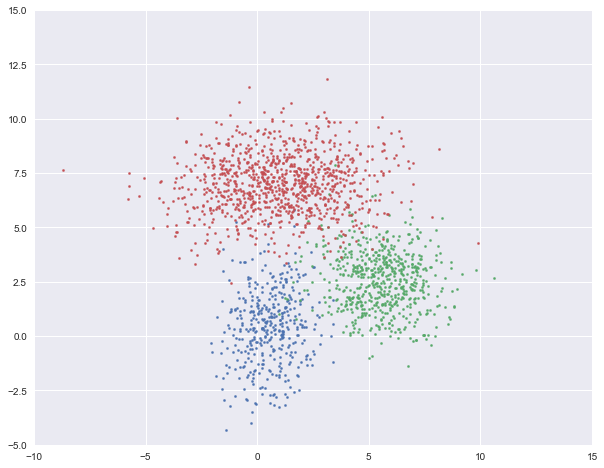

In [28]:
plt.figure(figsize=(10, 8))
plt.axis([-10, 15, -5, 15])
plt.scatter(X1[:, 0], X1[:, 1], s=5)
plt.scatter(X2[:, 0], X2[:, 1], s=5)
plt.scatter(X3[:, 0], X3[:, 1], s=5)
plt.show()

### 3.1 变量初始化
首先要对GMM模型参数以及隐变量进行初始化。通常可以用一些固定的值或者随机值。

n_clusters是GMM模型中聚类的个数，和K-Means一样我们需要提前确定。这里通过观察可以看出是3。（拓展阅读：如何确定GMM中聚类的个数？）

n_points是样本点的个数。

Mu是每个高斯分布的均值。

Var是每个高斯分布的方差，为了过程简便，我们这里假设协方差矩阵都是对角阵。

W是上面提到的隐变量，也就是每个样本属于每一簇的概率，在初始时，我们可以认为每个样本属于某一簇的概率都是1/3。

Pi是每一簇的比重，可以根据W求得，在初始时，Pi = [1/3, 1/3, 1/3]

In [29]:
n_clusters = 3
n_points = len(X)
Mu = [[0, -1], [6, 0], [0, 9]]
Var = [[1, 1], [1, 1], [1, 1]]
Pi = [1 / n_clusters] * 3
W = np.ones((n_points, n_clusters)) / n_clusters 
Pi = W.sum(axis=0) / W.sum()

In [34]:
def update_W(X, Mu, Var, Pi):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W


def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi

In [35]:
def logLH(X, Pi, Mu, Var):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], np.diag(Var[i]))
    return np.mean(np.log(pdfs.sum(axis=1)))


def plot_clusters(X, Mu, Var, Mu_true=None, Var_true=None):
    colors = ['b', 'g', 'r']
    n_clusters = len(Mu)
    plt.figure(figsize=(10, 8))
    plt.axis([-10, 15, -5, 15])
    plt.scatter(X[:, 0], X[:, 1], s=5)
    ax = plt.gca()
    for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 3 * Var[i][0], 3 * Var[i][1], **plot_args)
        ax.add_patch(ellipse)
    if (Mu_true is not None) & (Var_true is not None):
        for i in range(n_clusters):
            plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'alpha': 0.5}
            ellipse = Ellipse(Mu_true[i], 3 * Var_true[i][0], 3 * Var_true[i][1], **plot_args)
            ax.add_patch(ellipse)         
    plt.show()

In [36]:
def update_Mu(X, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    return Mu

def update_Var(X, Mu, W):
    n_clusters = W.shape[1]
    Var = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return Var

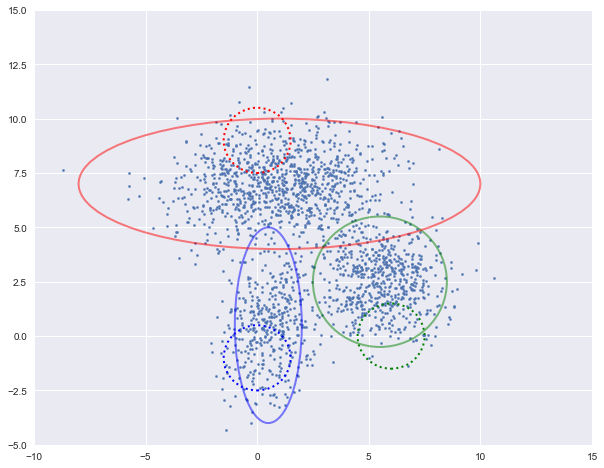

log-likehood:-8.031


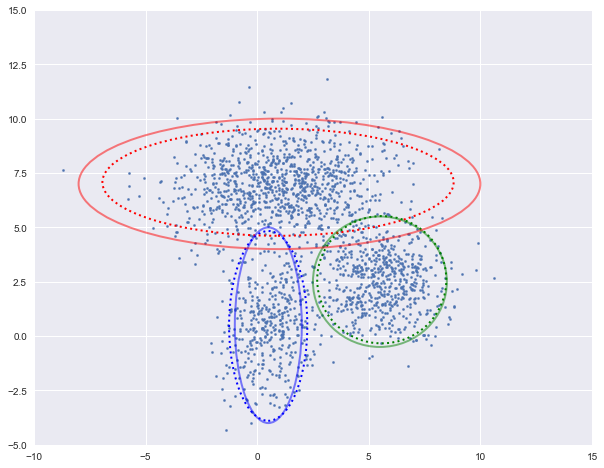

log-likehood:-4.684


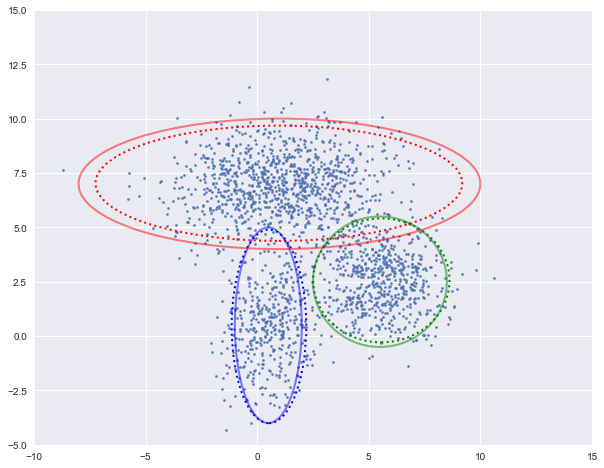

log-likehood:-4.681


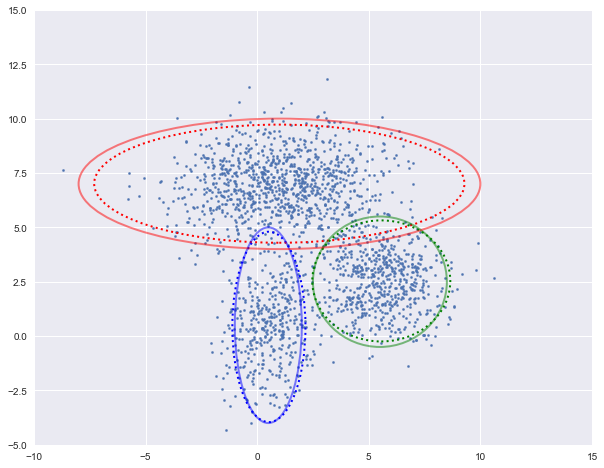

log-likehood:-4.681


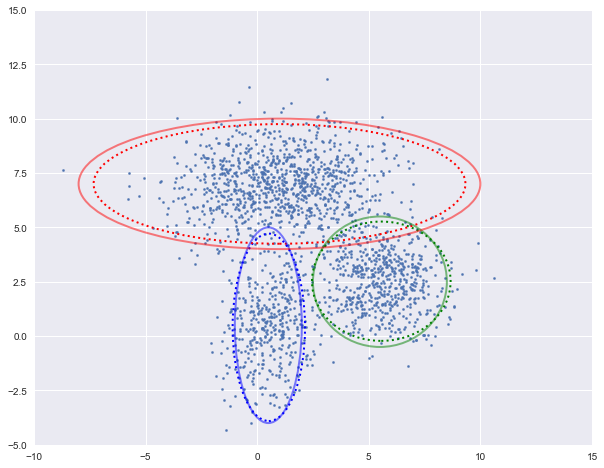

log-likehood:-4.681


In [37]:
loglh = []
for i in range(5):
    plot_clusters(X, Mu, Var, [mu1, mu2, mu3], [var1, var2, var3])
    loglh.append(logLH(X, Pi, Mu, Var))
    W = update_W(X, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(X, W)
    print('log-likehood:%.3f'%loglh[-1])
    Var = update_Var(X, Mu, W)

In [39]:
a = []
a.append(a)
print(getrefcount(a))

3
